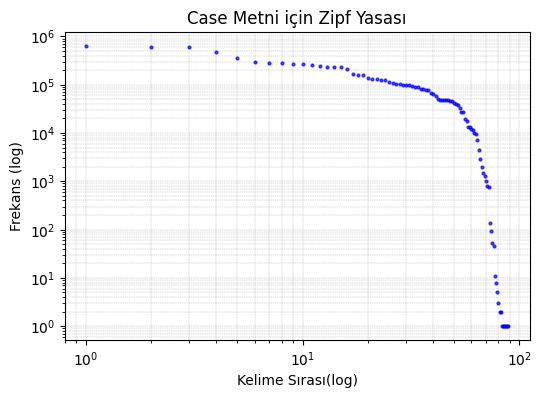

In [61]:
#jud.txt karar metinler
#Zipt Yasası Analizi
import nltk
import matplotlib.pyplot as plt
import numpy as np
import os

file_path=os.path.join("jud.txt")
with open ("jud.txt", "r", encoding="utf-8")as file:
    case=file.read()
#kelime frekanslarını hesapla
word_freq={}
for word in case:
    word_freq[word]= word_freq.get(word,0)+1

#frekansları azalan şekilde sırala
sorted_freqs=sorted(word_freq.values(),reverse=True)

#Rank olusştur
ranks=np.arange(1, len(sorted_freqs)+1)

#log-log grafiği ciz
plt.figure(figsize=(6,4))
plt.loglog(ranks, sorted_freqs, marker="o", linestyle="none", markersize=2, alpha=0.7, color="b")

#grafik etiketleri
plt.xlabel("Kelime Sırası(log)")
plt.ylabel("Frekans (log)")
plt.title("Case Metni için Zipf Yasası")

plt.grid(True, which="both", linestyle="--", linewidth=0.3)
plt.show()


In [10]:
#stop word  removal
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
stop_words_list=list(stop_words)
print(stop_words_list)

["weren't", 't', 'these', 'don', "should've", 'from', 'being', 'doing', 'my', 'wasn', 'shan', 'between', 'was', "i'll", 'do', 'because', 'same', 'won', 'once', "she's", 'ourselves', 'with', 'how', 'your', "it'd", 'ours', "doesn't", 'his', 'each', 'myself', 'as', "won't", "shouldn't", 'couldn', 'o', 'why', 'all', 'into', 'had', "i've", 'what', 'it', 'they', 'should', "they'll", 'hadn', 'too', 'against', 'but', "he'll", 'shouldn', "she'll", "aren't", 'weren', "isn't", 'there', 'didn', 'no', 'their', "he'd", 'will', 'during', 'isn', 'theirs', "they've", 've', 's', "you'll", 'out', 'mightn', "haven't", 'the', 'y', 'again', 'if', "wasn't", 'ma', 'only', "she'd", "don't", 'than', 're', 'down', 'doesn', 'am', 'll', "needn't", 'of', 'then', "we've", 'other', "it'll", "hasn't", 'been', 'just', 'after', "didn't", 'him', "we'll", 'where', 'while', 'by', 'we', 'did', 'herself', 'is', 'more', 'on', "wouldn't", 'itself', 'ain', 'such', "couldn't", "they'd", "hadn't", 'he', 'aren', 'this', "i'd", 'yo

In [11]:
#lemmatizer ve stemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
lemmatizer=WordNetLemmatizer()
stemmer=PorterStemmer()
import csv

In [66]:
#jud.txt bir bölümü
case[:1000]


'diary_no,Judgement_type,case_no,pet,res,pet_adv,res_adv,bench,judgement_by,judgment_dates,temp_link,language\t\n"5-2021,J,MA-000083 - 2021,UNION OF INDIA,ASSOCIATION OF UNIFIED TELECOM SERVICEPROVIDERS OF INDIA AND  ORS,B. VIJAYALAKSHMI MENON,,""HON\'BLE MR. JUSTICE L. NAGESWARA RAO, HON\'BLE MR. JUSTICE S. ABDUL NAZEER, HON\'BLE MR. JUSTICE M.R. SHAH"",HON\'BLE MR. JUSTICE L. NAGESWARA RAO,23-07-2021,supremecourt/2021/5/5_2021_36_1501_28814_Judgement_23-Jul-2021.pdf,"\t\n"28-2021,J,C.A. No.-000867-000867 - 2021,INDEX MEDICAL COLLEGE HOSPITAL AND RESEARCH CENTER,THE STATE OF MADHYA PRADESH,NISHIT AGRAWAL,,""HON\'BLE MR. JUSTICE L. NAGESWARA RAO, HON\'BLE MS. JUSTICE INDIRA BANERJEE"",HON\'BLE MR. JUSTICE L. NAGESWARA RAO,03-02-2021,supremecourt/2021/28/28_2021_38_14_25922_Judgement_03-Feb-2021.pdf,"\t\n"70-2020,J,Crl.A. No.-000167-000167 - 2021,ARCHANA RANA,THE STATE OF UTTAR PRADESH,SANJEEV MALHOTRA,,""HON\'BLE THE CHIEF JUSTICE, HON\'BLE MR. JUSTICE M.R. SHAH"",HON\'BLE THE CHIEF JU

In [59]:
sentences=sent_tokenize(case)

In [14]:
#lemmatizer ve Stemmer başlatıldı
lemmatizer=WordNetLemmatizer()
stemmer=PorterStemmer()

In [15]:
def preprocess_sentence(sentence):
    tokens=word_tokenize(sentence)
    filtered_tokens=[token.lower() for token in tokens if token.isalpha() and token.lower() not in stop_words]
    
    lemmatized_tokens=[lemmatizer.lemmatize(token) for token in filtered_tokens]
    stemmed_tokens=[stemmer.stem(token) for token in filtered_tokens]
    
    return lemmatized_tokens, stemmed_tokens

In [16]:
#her cünleyi tekenleştir, lemmatize et ve stemle
tokenized_corpus_lemmatized=[]
tokenized_corpus_stemmed=[]

In [17]:
for sentence in sentences:
    lemmatized_tokens, stemmed_tokens=preprocess_sentence(sentence)
    tokenized_corpus_lemmatized.append(lemmatized_tokens)
    tokenized_corpus_stemmed.append(stemmed_tokens)
    

In [18]:
with open("lemmatized_sentences.csv", mode="w",newline="",encoding="utf-8") as file:
    writer=csv.writer(file)
    #her cünleyi 1 satır olarak yaz
    for tokens in tokenized_corpus_lemmatized:
        writer.writerow([' '.join(tokens)])

In [19]:
with open("stemmed_sentences.csv",mode="w",newline="", encoding="utf-8") as file:
    writer=csv.writer(file)
    #her cünleyi bir satır olarak yaz
    for tokens in tokenized_corpus_stemmed:
        writer.writerow([' '.join(tokens)])

In [20]:
#ilk 5 kararı yadıralım
for i in range(5):
    print(f"Cümle {i+1} - Base: {sentences[i]}")
    print(f"Cümle {i+1} - Lemmatized: {tokenized_corpus_lemmatized[i]}")
    print(f"Cümle {i+1} - Stemmed: {tokenized_corpus_stemmed[i]}")
    print("\n")

Cümle 1 - Base: diary_no,Judgement_type,case_no,pet,res,pet_adv,res_adv,bench,judgement_by,judgment_dates,temp_link,language	
"5-2021,J,MA-000083 - 2021,UNION OF INDIA,ASSOCIATION OF UNIFIED TELECOM SERVICEPROVIDERS OF INDIA AND  ORS,B.
Cümle 1 - Lemmatized: ['pet', 're', 'bench', 'language', 'j', 'union', 'india', 'association', 'unified', 'telecom', 'serviceproviders', 'india', 'or', 'b']
Cümle 1 - Stemmed: ['pet', 're', 'bench', 'languag', 'j', 'union', 'india', 'associ', 'unifi', 'telecom', 'serviceprovid', 'india', 'or', 'b']


Cümle 2 - Base: VIJAYALAKSHMI MENON,,""HON'BLE MR. JUSTICE L. NAGESWARA RAO, HON'BLE MR. JUSTICE S. ABDUL NAZEER, HON'BLE MR. JUSTICE M.R.
Cümle 2 - Lemmatized: ['vijayalakshmi', 'menon', 'justice', 'nageswara', 'rao', 'justice', 'abdul', 'nazeer', 'justice']
Cümle 2 - Stemmed: ['vijayalakshmi', 'menon', 'justic', 'nageswara', 'rao', 'justic', 'abdul', 'nazeer', 'justic']


Cümle 3 - Base: SHAH"",HON'BLE MR. JUSTICE L. NAGESWARA RAO,23-07-2021,supremecourt/

In [21]:
#stemming sonu elde edilen veri csv olarak kaydedildi
stemmed_folder="C:\\Users\\svdbu\\OneDerive\\Masaüstü\\NLPPROJE"
stemmed_output_file=os.path.join(stemmed_folder,f"{file.name.replace('.csv','_stemmed.csv')}")

In [22]:
#lemmatization sorucu elde edilen veri csv olarak kaydedildi
lemmatized_folder="C:\\Users\\svdbu\\OneDrive\\Masaüstü\\NLPPROJE"
lemmatized_output_file=os.path.join(lemmatized_folder,f"{file.name.replace('.csv','_lemmatized.csv')}")

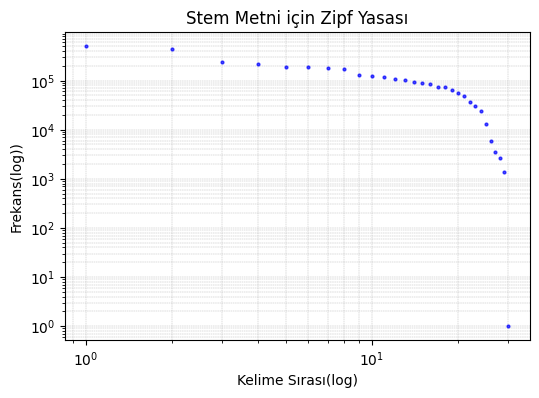

In [23]:
# STEMMİNG için Zipf analizi

file_path=os.path.join("stemmed_sentences.csv")
with open("stemmed_sentences.csv","r",encoding="utf-8")as file:
    stem=file.read()
#kelime frekanslarını hesapla
word_freq={}
for word in stem:
    word_freq[word]=word_freq.get(word,0)+1
#frekansları azaltan şekilde sırala
sorted_freqs=sorted(word_freq.values(),reverse=True)
#Rank oluştur
ranks=np.arange(1,len(sorted_freqs)+1)
#Log-log grafiği çiz
plt.figure(figsize=(6,4))
plt.loglog(ranks,sorted_freqs, marker="o",linestyle="none",markersize=2,alpha=0.7,color="b")
#grafik etiketleri
plt.xlabel("Kelime Sırası(log)")
plt.ylabel("Frekans(log))")
plt.title("Stem Metni için Zipf Yasası")

plt.grid(True, which="both",linestyle="--",linewidth=0.3)
plt.show()
           
                
    


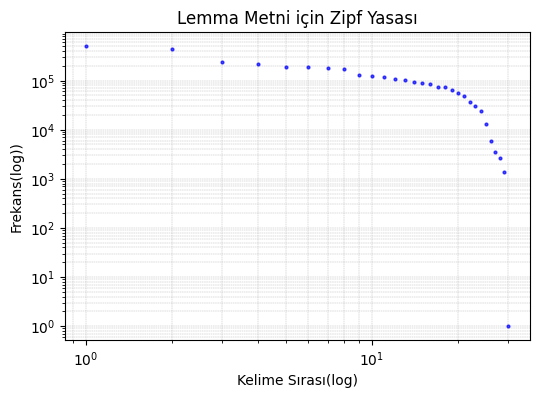

In [24]:
# LEMMATİZATİON  için Zipf analizi

file_path=os.path.join("stemmed_sentences.csv")
with open("stemmed_sentences.csv","r",encoding="utf-8")as file:
    stem=file.read()
#kelime frekanslarını hesapla
word_freq={}
for word in stem:
    word_freq[word]=word_freq.get(word,0)+1
#frekansları azaltan şekilde sırala
sorted_freqs=sorted(word_freq.values(),reverse=True)
#Rank oluştur
ranks=np.arange(1,len(sorted_freqs)+1)
#Log-log grafiği çiz
plt.figure(figsize=(6,4))
plt.loglog(ranks,sorted_freqs, marker="o",linestyle="none",markersize=2,alpha=0.7,color="b")
#grafik etiketleri
plt.xlabel("Kelime Sırası(log)")
plt.ylabel("Frekans(log))")
plt.title("Lemma Metni için Zipf Yasası")

plt.grid(True, which="both",linestyle="--",linewidth=0.3)
plt.show()
           
                
    


In [64]:
#Vektorization STEM için
import pandas as pd
file_path=os.path.join("stemmed_sentences.csv")
with open("stemmed_sentences.csv","r", encoding="utf-8") as file:
    stem=file.read()
from sklearn.feature_extraction.text import TfidfVectorizer
lemmatizer=WordNetLemmatizer()
stemmer=PorterStemmer()
stop_words=set(stopwords.words('english'))

def preprocess_sentence(stem):
    tokens=word_tokenize(stem)
    filtered_tokens=[token.lower() for token in tokens if token.isalpha() and token.lower() not in stop_words]

    lemmatized_tokens=[lemmatizer.lemmatize(token) for token in filtered_tokens]
    stemmed_tokens=[stemmer.stem(token) for token in filtered_tokens]
    return lemmatized_tokens, stemmed_tokens

tokenized_corpus_lemmatized=[]
tokenized_corpus_stemmed=[]

for sentence in sentences:
    lemmatized_tokens,stemmed_tokens=preprocess_sentence(sentence)
    tokenized_corpus_stemmed.append(lemmatized_tokens)
    tokenized_corpus_lemmatized.append(stemmed_tokens)

#TF-IDF vertörleri
lemmatized_texts=[' '.join(tokens) for tokens in tokenized_corpus_lemmatized]
vectorizer=TfidfVectorizer()
A_matrix=vectorizer.fit_transform(lemmatized_texts)
#kelimeleri alma
#TF-IDF vektörleştime işleminde tüm kelimelerin eşsiz bizr listesini verir
feature_names=vectorizer.get_feature_names_out()
#TF-IDF matrisini pandas Dataframe'e çevir 
#DATAFRAME ÇEVİR
A_df=pd.DataFrame(A_matrix.toarray().transporse(), index=vectorizer.get_feature_names, columns=feature_names)



MemoryError: Unable to allocate 21.4 GiB for an array with shape (94169, 30481) and data type float64

In [41]:
#satırları gösterme
print(feature_names)

['aa' 'aaba' 'aabida' ... 'zuraina' 'zurmur' 'zutshi']


In [51]:
#skorlara göre sırala
first_vektor=A_df.iloc[0]
top_sentence=first_vektor.sort_values(ascending=False).head(7)
print("ilk cümlede en yüksek TF-IDF skoruna sahip kelime")
print(top_sentence)

NameError: name 'A_df' is not defined

In [52]:
#Vektorization LEMMATİZATİON için
file_path=os.path.join("lemmatized_sentences.csv")
with open("lemmatized_sentences.csv","r",encoding="utf-8") as file:
    lemma=file.read()
lemmatizer=WordNetLemmatizer()
stemmer=PorterStemmer()
stop_words=set(stopwords.words('english'))
def preprocess_sentence(lemma):
    tokens=word_tokenize(lemma)
    filtered_tokens=[token.lower() for token in tokens if token.isalpha() and token.lower() not in stop_words]

    lemmatizer_tokens=[lemmatizer.lemmatize(token) for token in filtered_tokens]
    stemmer_tokens=[stemmer.stem(token) for token in filtered_tokens]
    return lemmatized_tokens, stemmed_tokens

tokenized_corpus_lemmatized=[]
tokenized_corpus_stemmed=[]
for sentence in sentences:
    lemmatized_tokens, stemmed_tokens=preprocess_sentence(sentence)
    tokenized_corpus_stemmed.append(lemmatized_tokens)
    tokenized_corpus_lemmatized.append(stemmed_tokens)
    
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
#Ön işleme sonrası token listelerini tekrar metne çevirme
lemmatized_texts=[' '.join(tokens) for token in tokenized_corpus_lemmatized]
#TF-IDF vektörizeri başlatma
vektorizer=TfidfVectorizer()

#TF-IDF matrixlerini oluşturma
#TF-IDF vektörlerine dönüştürme
tfidf_matrix=vectorizer.fit_transform(lemmatized_texts)
#kelimeleri alma
#F-IDF vektörleştime işleminde tüm kelimelerin eşsiz bizr listesini verir
feature_names=vectorizer.get_feature_names_out()
#TF-IDF matrisini pandas Dataframe'e çevir 
tfidf_df=pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)


In [62]:
#ilk satırları gösterme
print(tfidf_df)

       banumathi  lalit  uday  umesh
0            0.5    0.5   0.5    0.5
1            0.5    0.5   0.5    0.5
2            0.5    0.5   0.5    0.5
3            0.5    0.5   0.5    0.5
4            0.5    0.5   0.5    0.5
...          ...    ...   ...    ...
94164        0.5    0.5   0.5    0.5
94165        0.5    0.5   0.5    0.5
94166        0.5    0.5   0.5    0.5
94167        0.5    0.5   0.5    0.5
94168        0.5    0.5   0.5    0.5

[94169 rows x 4 columns]


In [54]:
#skorlara göre sırala
first_vektor=tfidf_df.iloc[0]
top_sentence=first_vektor.sort_values(ascending=False).head()
print("ilk cümlede en yüksek TF-IDF skoruna sahip kelime")
print(top_sentence)

ilk cümlede en yüksek TF-IDF skoruna sahip kelime
banumathi    0.5
lalit        0.5
uday         0.5
umesh        0.5
Name: 0, dtype: float64


In [78]:
#Word2Vec vektörleştirme
#Gensim kütüphanesi

from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import os
file_path=os.path.join("lemmatized.sentences.csv")
with open("lemmatized_sentences.csv","r",encoding= "utf-8") as file:
    lemma=file.read()

lemmatizer=WordNetLemmatizer()
stemmer=PorterStemmer()
stop_words=set(stopwords.words('english'))

def preprocess_sentence(lemma):
    tokens=word_tokenize(lemma)
    filtered_tokens=[token.lower() for token in tokens if token.isalpha() not in stop_words]

    lemmatized_tokens=[lemmatizer.lemmatize(token) for token in filtered_tokens]
    stemmed_tokens=[stemmer.stem(token) for token in filtered_tokens]
    return lemmatized_tokens, stemmed_tokens

tokenized_corpus_lemmatized=[]
tokenized_corpus_stemmed=[]

for sentence in sentences:
    lemmatized_tokens, stemmed_tokens=preprocess_sentence(sentence)
    tokenized_corpus_stemmed.append(lemmatized_tokens)
    tokenized_corpus_lemmatized.append(stemmed_tokens)

    #Word2Vec modeli eğitmek için parametreler
parameters=[{'model_type':'cbow','window':2,'vector_size':100},
            {'model_type':'skipgram','window':2,'vector_size':100},
            {'model_type':'cbow','window':4,'vector_size':100},
            {'model_type':'skipgram','window':4,'vector_size':100},
            {'model_type':'cbow','window':2,'vector_size':300},
            {'model_type':'skipgram','window':2,'vevtor_size':300},
            {'model_type':'cbow','window':4,'vector_size':300},
            {'model_type':'skipgram','window':4,'vector_size':300}]
def train_and_save_model(corpus, params, model_name):
    model=Word2Vec{corpus,vector_size==params['vector_size']
    window==params['window'], min_count}=1, sg=1 if params['model_type']==('skipgram'
    else 0),
    model.save(f\"{model_name}_{params['model_type']_window{params['window']_dim{params['vector_size']}.model\")
               print(
             

SyntaxError: invalid syntax. Perhaps you forgot a comma? (897131428.py, line 44)